In [19]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

(6160384,)
(256, 256, 94)


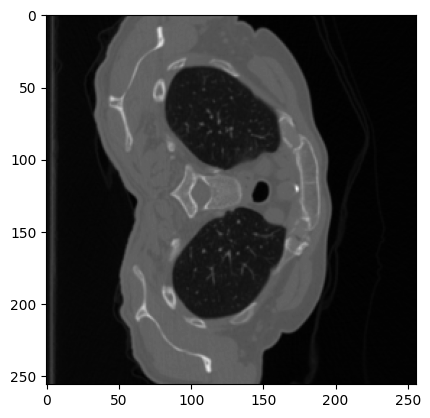

In [24]:
path = '/mnt/camca_NAS/case1_T00_s.img' # 改成你的文件地址
data = np.fromfile(path, dtype=np.int16)
print(data.shape)
data = data.reshape((256,256,94),order = 'F') #这个dimension去网站上看，每个case的都不一样

data = np.flip(np.flip(data, axis=1),axis = 0)  
# 上面这行代码不一定要或者需要改动，因为每个case的orientation都可能不同，具体就是要确保最后生成的nii文件放到ITK-snap中，
# 它的显示的方向（比如心脏的位置等，要仔细看）是和我给你的例子一样的。如果不一样就要改这行代码


print(data.shape)
plt.imshow(data[:,:,20], cmap = "gray") # 显示一下切片，确认你的读取是正确的

# save to nii image
nb_data = nib.Nifti1Image(data, np.eye(4))
save_folder = '/mnt/camca_NAS/' # 改成你的save folder
nib.save(nb_data, os.path.join(save_folder, 'case1_T00_s.nii.gz')) # 改成你想要的文件名

6160384